# Data Science and Business Analyst

### Sparks Foundation 
### GRIP FEB'21

#### BY - RIYA TANNA
#### TASK 1: Prediction using Supervised ML
#### Predict the percentage of an student based on the no. of study hours. 

### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data from csv file
data = pd.read_csv("scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.dtypes     #data types

Hours     float64
Scores      int64
dtype: object

In [4]:
data.shape     # Number of rows and columns

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()  # To check if there is any null values present

Hours     0
Scores    0
dtype: int64

### Data Visualization  

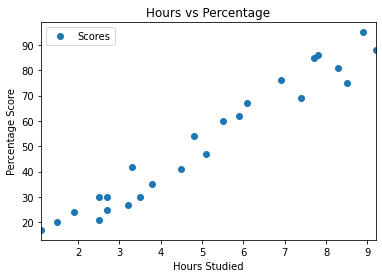

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### The above graph clearly shows there is a linear relationship between the numbers of hours studied and the percentage score

### Data Preparation

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Regression Model  

In [10]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

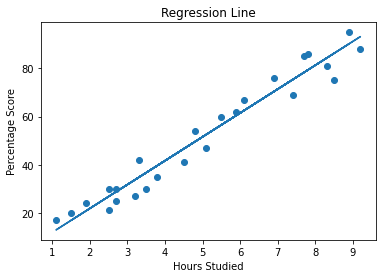

In [11]:
line = model.coef_*X + model.intercept_      # regression line equation 

#Plotting the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.title('Regression Line') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Making Predictions

In [12]:
print(X_test)

y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  # Comparing actual and predicted values 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Testing the data for an user defined input

hours = float(input("Enter the number of hours: "))
own_pred = model.predict([[hours]])
print("\nNo of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the number of hours: 8.5

No of Hours = 8.5
Predicted Score = 86.2587401268937


### Evaluation  

In [15]:
# Accuracy
model.score(X_test,y_test)

0.9454906892105356

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
